# Matplotlib Format Charts with `subplots`

In [1]:
# Importing Libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## This script visualizes job title distribution and the top 3 job schedule types using bar charts with Matplotlib.

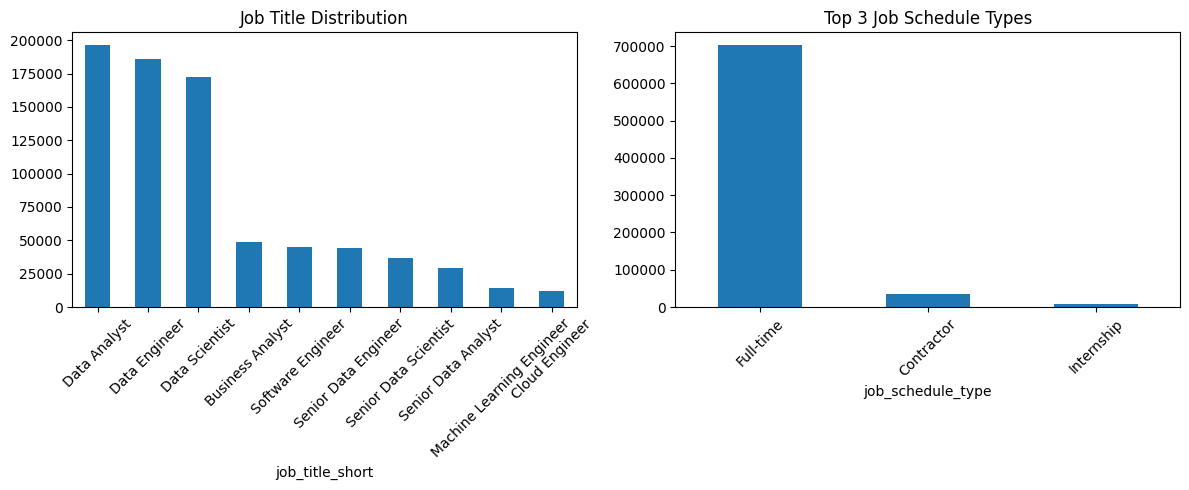

In [31]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of job titles
# Sorting in descending order for better visualization
df['job_title_short'].value_counts(ascending=False).plot(kind='bar', ax=ax[0])
ax[0].set_title("Job Title Distribution")
ax[0].tick_params(axis='x', rotation=45)
# Plot the top 3 job schedule types
# Sorting in descending order and selecting the top 3
df['job_schedule_type'].value_counts(ascending=False).head(3).plot(kind='bar', ax=ax[1])
ax[1].set_title("Top 3 Job Schedule Types")
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plots
plt.show()

## Analyzing the Most In-Demand Skills by Job Title

In [10]:
# Create a copy of the DataFrame
skill_count = df.copy()

# Explode the 'job_skills' column to separate multiple skills listed in a single row
skill_count = df.explode('job_skills')

# Group by job title and skill, then count occurrences
skill_count = skill_count.groupby(['job_title_short', 'job_skills']).size()

# Convert the grouped data into a DataFrame with a new column 'skill_count'
df_skill_count = skill_count.reset_index(name='skill_count')

# Sort the DataFrame by skill count in descending order
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

# Display the sorted skill count DataFrame
df_skill_count


,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
45,Business Analyst,digitalocean,1
2241,Software Engineer,visualbasic,1
29,Business Analyst,codecommit,1
24,Business Analyst,chainer,1


## Count of Top Skills in Job Postings

### This chart displays the most common skills required for Business Analyst, Data Analyst, and Data Scientist positions based on job postings.


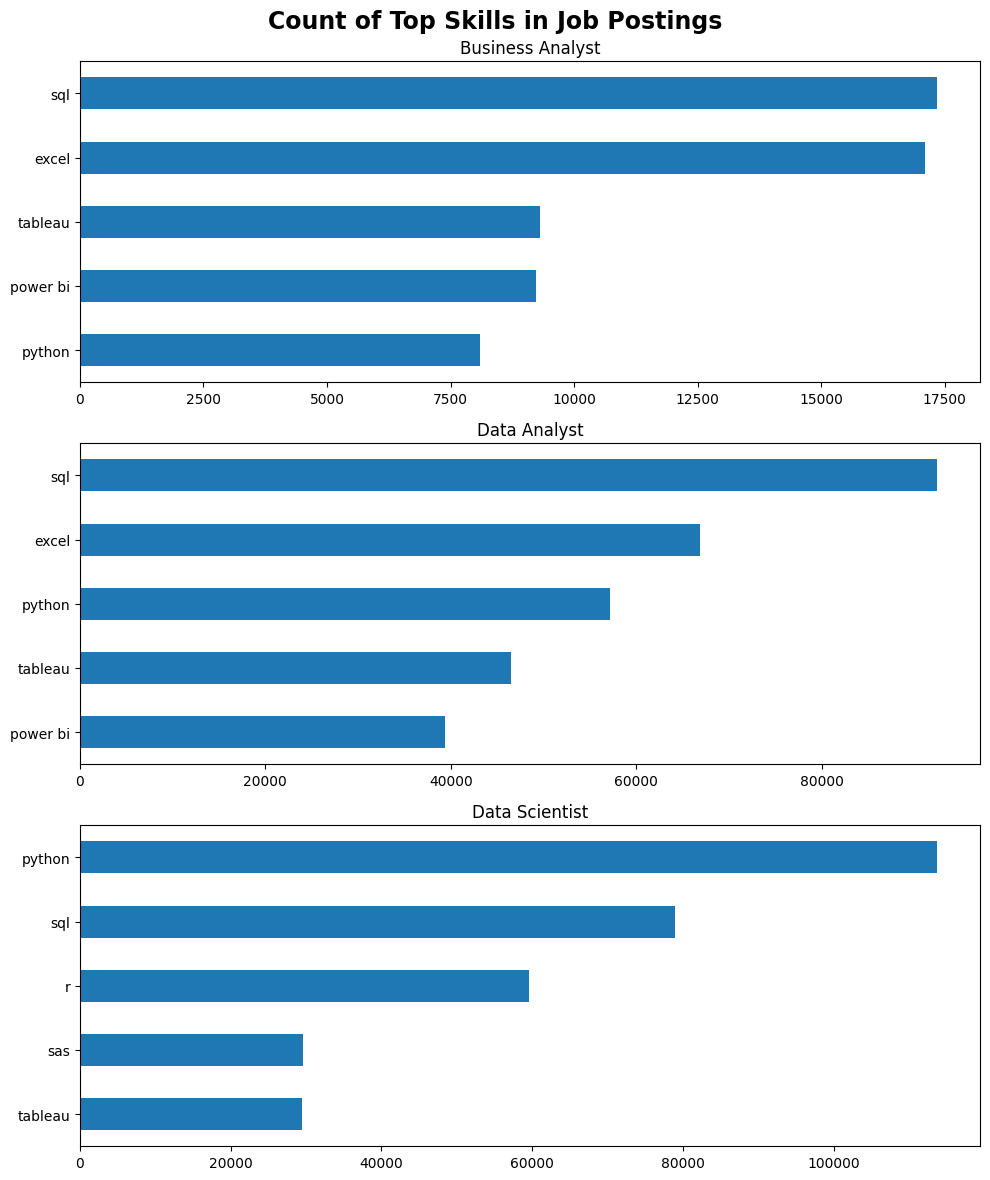

In [29]:
# Define job titles
job_titles = ['Business Analyst', 'Data Analyst', 'Data Scientist']

# Create a figure with 3 rows, 1 column
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Loop through each job title and plot top 5 skills
for i, job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', ax=ax[i], x='job_skills', y='skill_count', title=job_title)
    
    # Invert y-axis for better readability
    ax[i].invert_yaxis()
    
    # Remove y-label (redundant)
    ax[i].set_ylabel('')
    
    # Hide legend for a cleaner look
    ax[i].legend().set_visible(False)

# Add a main title
fig.suptitle('Count of Top Skills in Job Postings', fontsize=17, fontweight='bold')

# Adjust spacing to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()
